In [1]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import pylab
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# for ANN   

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
df=pd.read_csv("P://projetcs//vs python//bank customers.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [97]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15926 non-null  int64  
 1   Age              15926 non-null  float64
 2   Tenure           15926 non-null  int64  
 3   Balance          15926 non-null  float64
 4   NumOfProducts    15926 non-null  int64  
 5   HasCrCard        15926 non-null  int64  
 6   IsActiveMember   15926 non-null  int64  
 7   EstimatedSalary  15926 non-null  float64
 8   Exited           15926 non-null  int64  
 9   Geography_1      15926 non-null  bool   
 10  Geography_2      15926 non-null  bool   
 11  Gender_1         15926 non-null  bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 1.1 MB


In [107]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


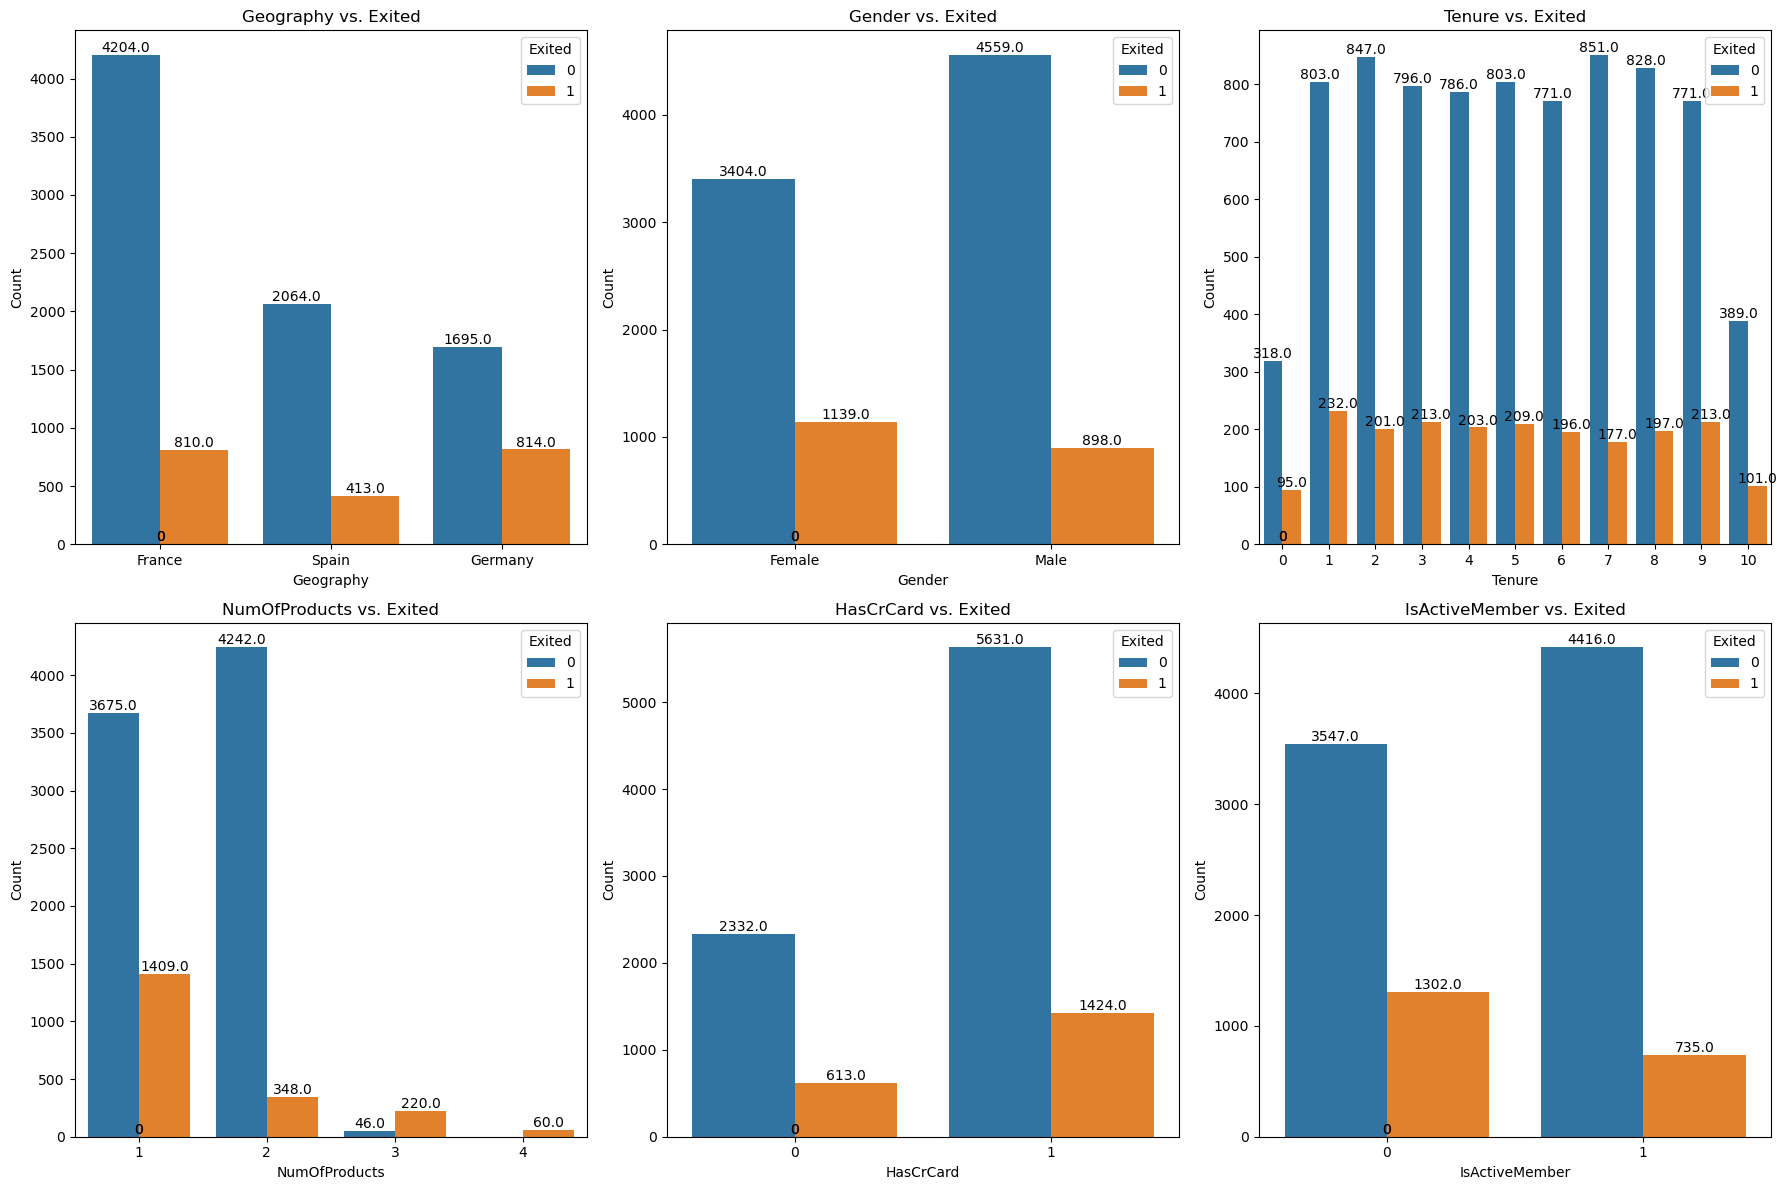

In [109]:
features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for ax, feature in zip(axs.flatten(), features):
    sns.countplot(x=feature, hue='Exited', data=df, ax=ax)
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    # Add values on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


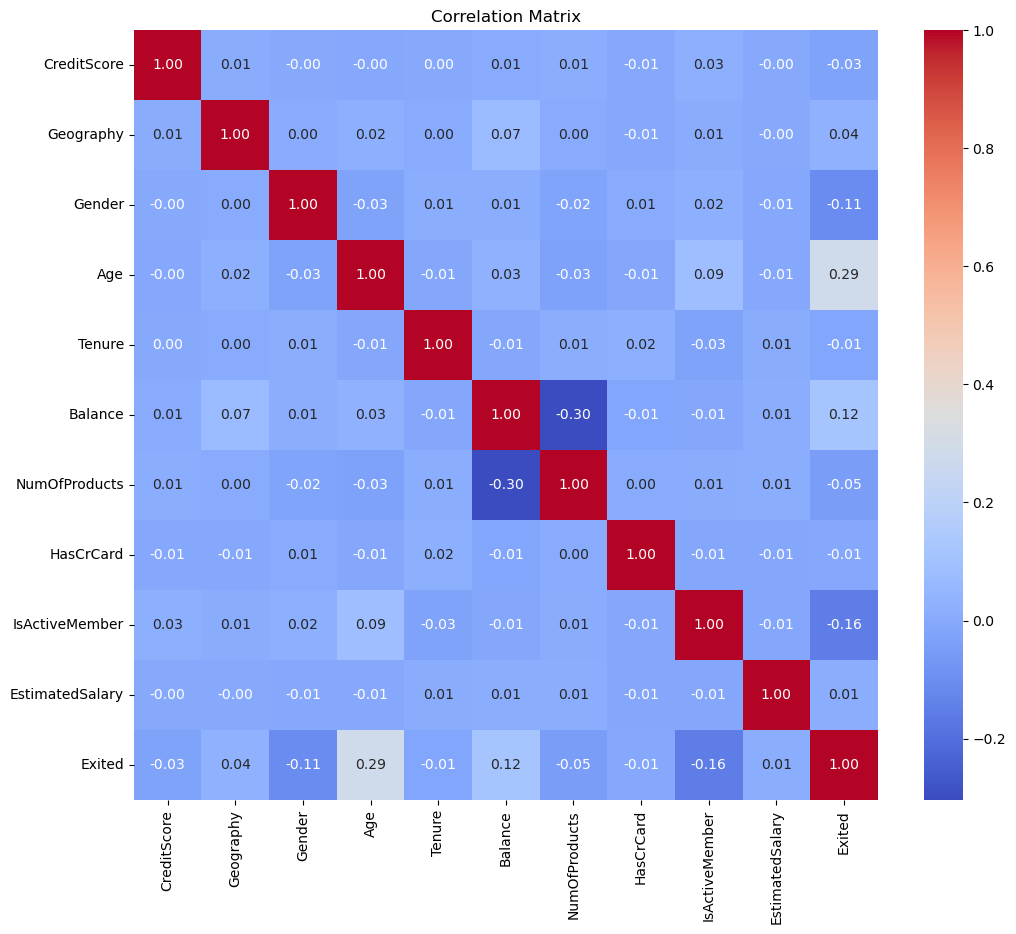

In [113]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns  # Select all object type columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Check data types again
print(df.dtypes)

# Create correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

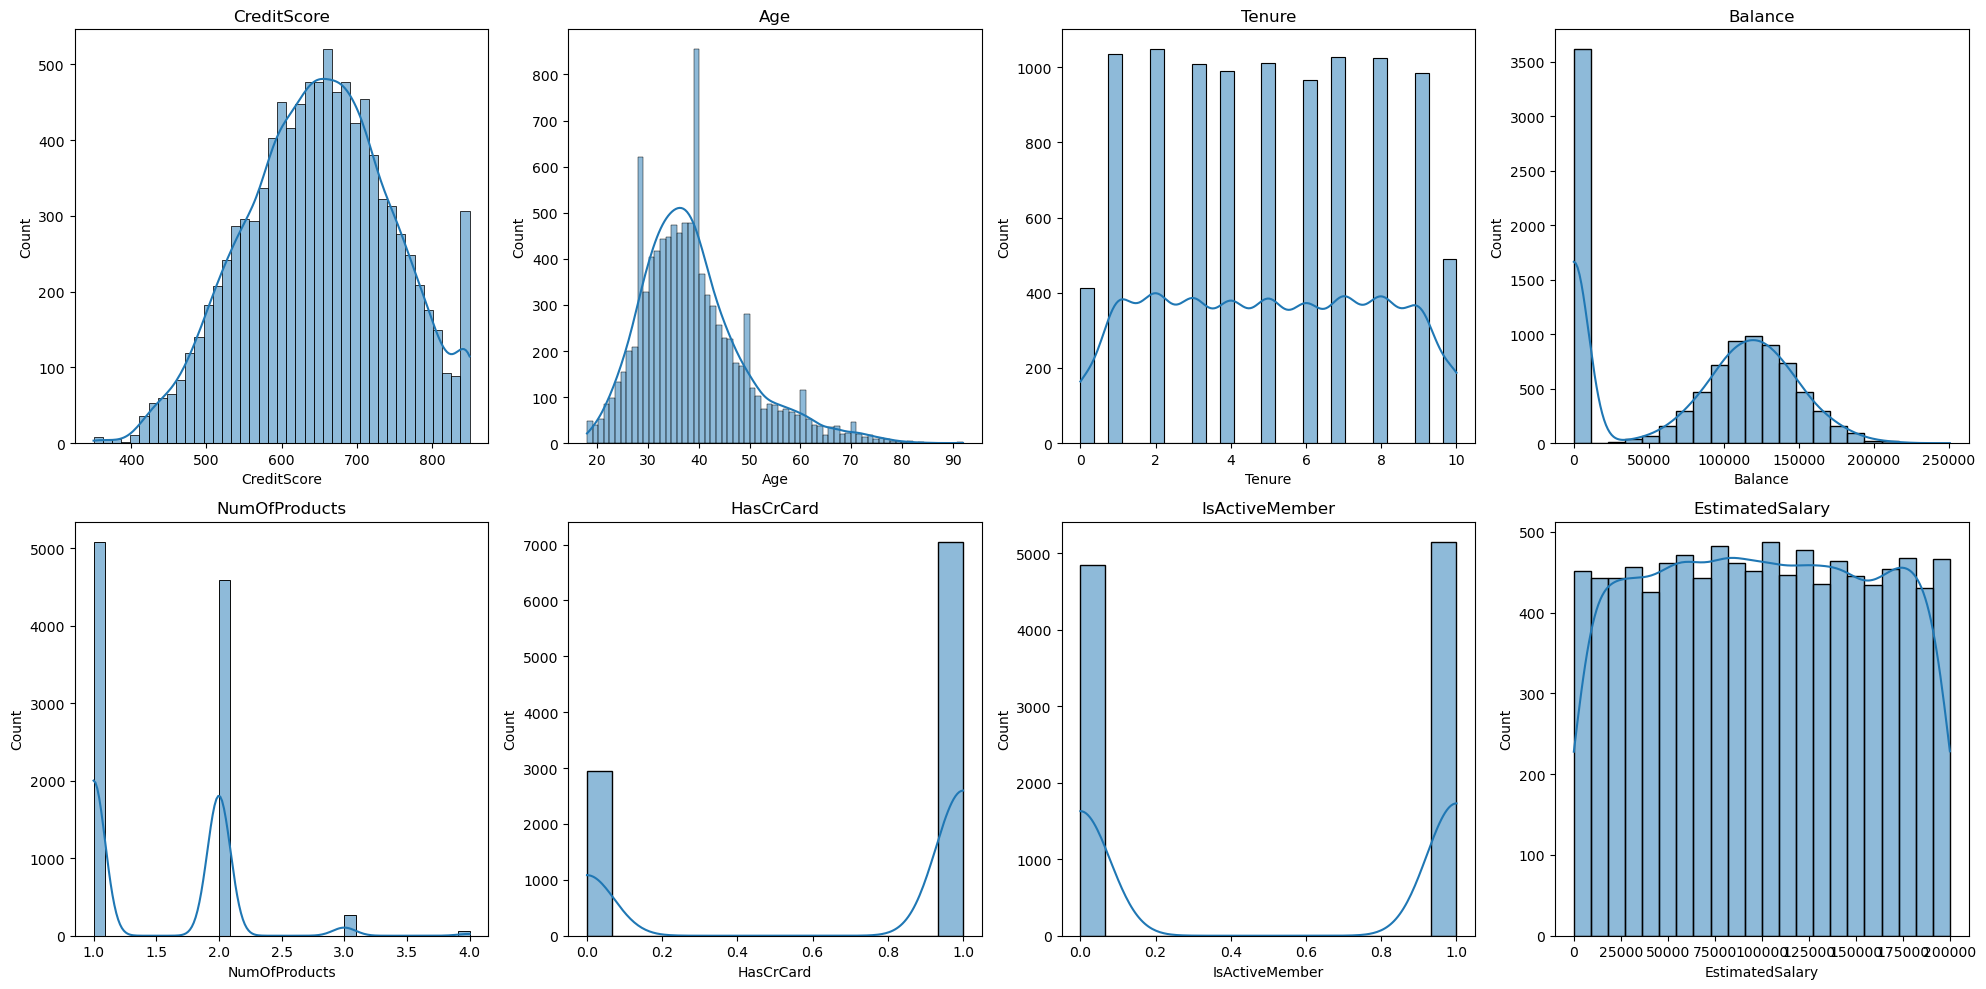

In [115]:
# Create histograms
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# List of variables
variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

for ax, var in zip(axes.flatten(), variables):
    sns.histplot(df[var], ax=ax, kde=True)
    ax.set_title(var)

plt.tight_layout()
plt.show()

In [119]:
# print skewnss 
print(df.skew())
print("Skewness before transformation:")
print(df['Age'].skew())

# Apply logarithmic transformation (base 10) to the 'Age' variable
# Adding a small constant (1e-9) to avoid log(0) if there are any zero values
df['Age'] = np.log10(df['Age'] + 1e-9)

print("Skewness after transformation:")
print(df['Age'].skew())


CreditScore       -0.071607
Geography          0.500916
Gender            -0.183596
Age                0.182020
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64
Skewness before transformation:
0.18202011258158898
Skewness after transformation:
-0.046405871494368436


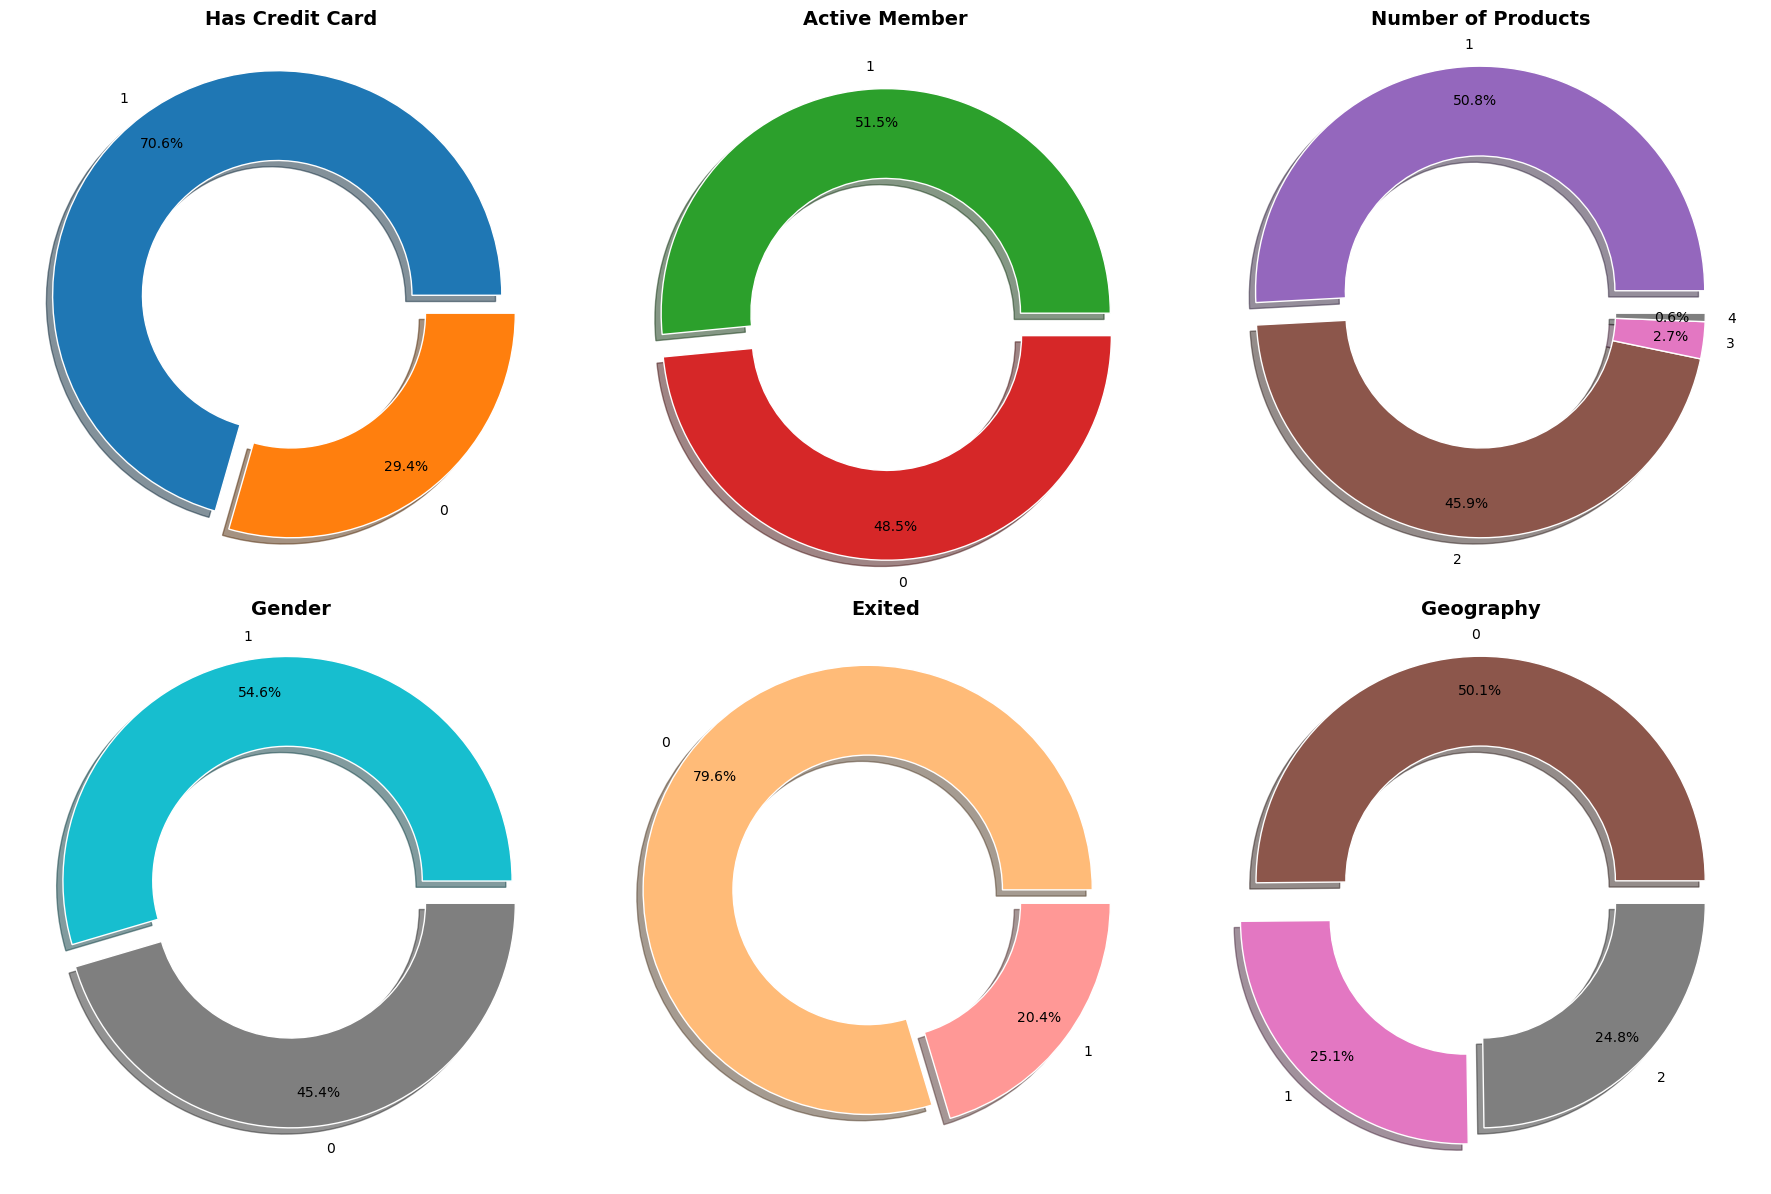

In [121]:
# Define colors and explode values for each pie chart
colors = {
    'HasCrCard': ['#1f77b4', '#ff7f0e'],
    'IsActiveMember': ['#2ca02c', '#d62728'],
    'NumOfProducts': ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],
    'Gender': ['#17becf', '#7f7f7f'],
    'Exited': ['#ffbb78', '#ff9896'],
    'Geography': ['#8c564b', '#e377c2', '#7f7f7f']
}

explode_values = {
    'HasCrCard': (0.1, 0),
    'IsActiveMember': (0, 0.1),
    'NumOfProducts': (0.1, 0, 0, 0),
    'Gender': (0.1, 0),
    'Exited': (0.1, 0),
    'Geography': (0.1, 0.1, 0)
}

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# List of columns and titles
columns = ['HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Gender', 'Exited', 'Geography']
titles = ['Has Credit Card', 'Active Member', 'Number of Products', 'Gender', 'Exited', 'Geography']

# Plot each pie chart
for ax, column, title in zip(axs.flatten(), columns, titles):
    counts = df[column].value_counts()
    ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=colors[column],
        explode=explode_values[column] + (0,) * (len(counts) - len(explode_values[column])),
        shadow=True,
        wedgeprops=dict(width=0.4, edgecolor='w'),
        pctdistance=0.85
    )
    ax.set_title(title, fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


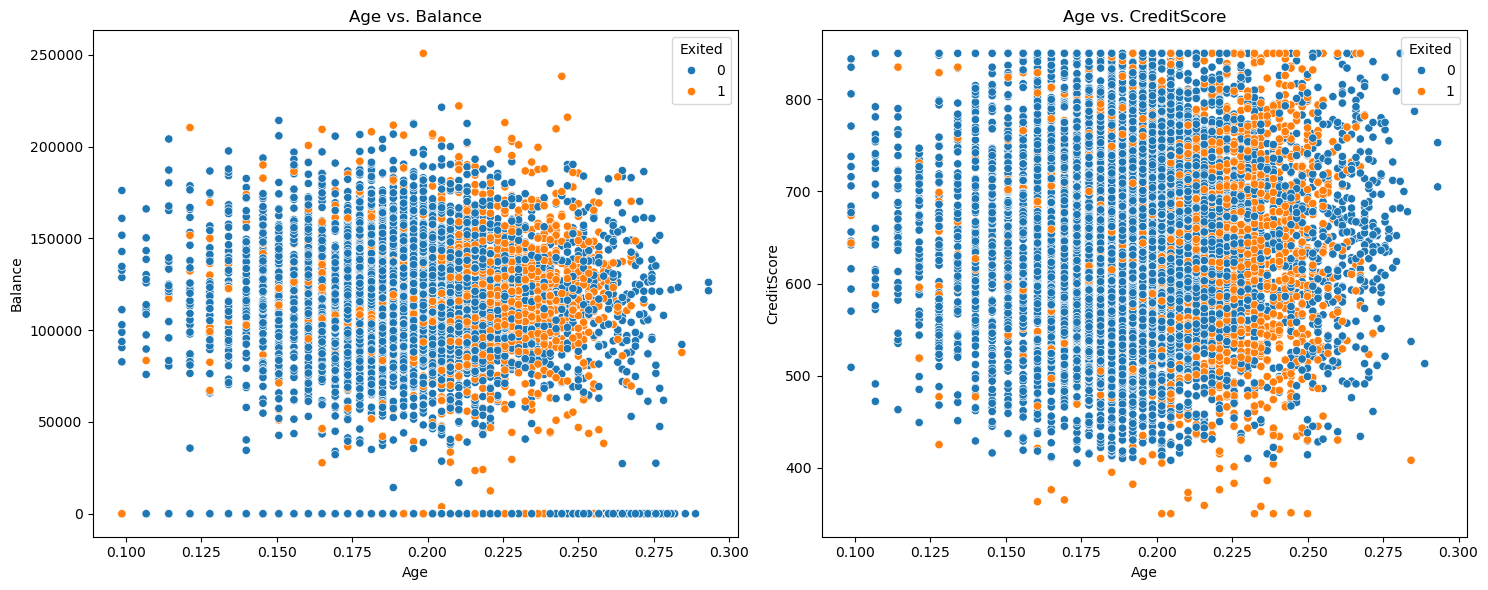

In [123]:

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, ax=axs[0])
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=df, ax=axs[1])

axs[0].set_title('Age vs. Balance')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Balance')
axs[1].set_title('Age vs. CreditScore')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('CreditScore')

plt.tight_layout()
plt.show()

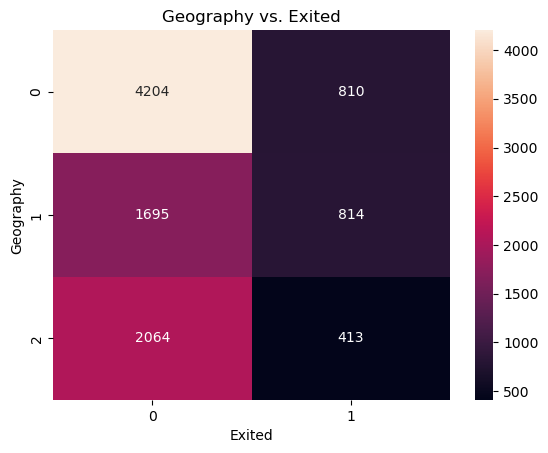

In [125]:
# create cross table
table = pd.crosstab(df['Geography'], df['Exited'])
sns.heatmap(table, annot=True,  fmt='g')
plt.title('Geography vs. Exited')
plt.show()

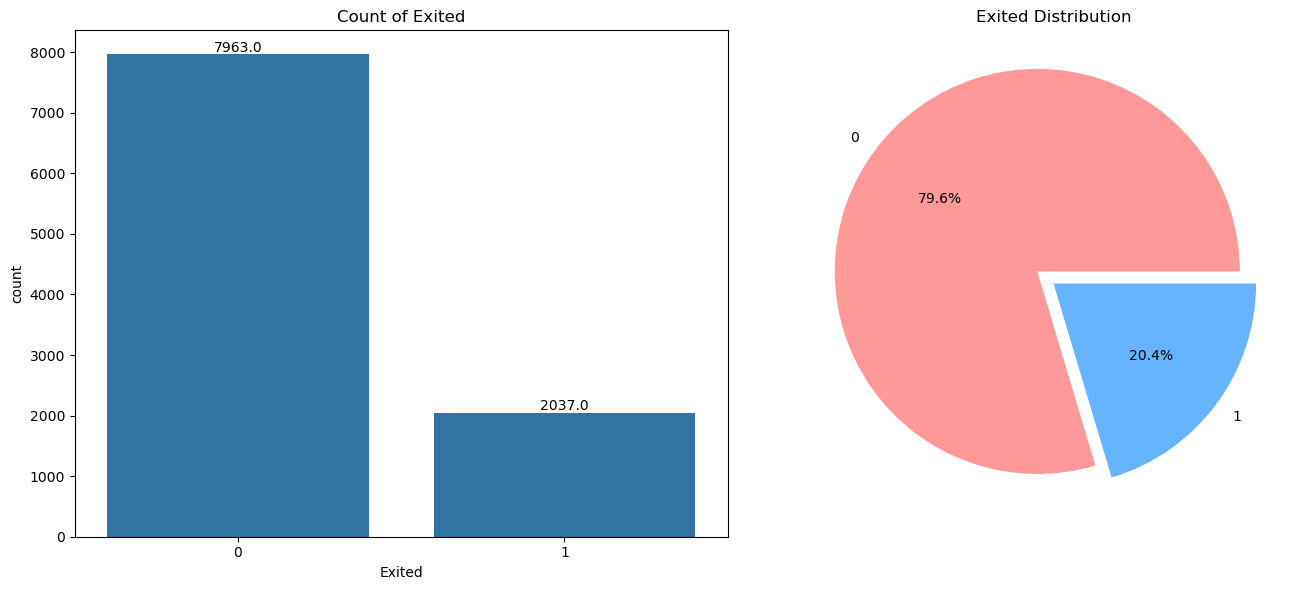

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot with values on bars
sns.countplot(x='Exited', data=df, ax=axs[0])
axs[0].set_title('Count of Exited')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')

# Pie chart
exit_counts = df['Exited'].value_counts()
axs[1].pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=(0.1, 0))
axs[1].set_title('Exited Distribution')
plt.tight_layout()
plt.show()

In [133]:
df_majority = df[df['Exited'] == 0]
df_minority = df[df['Exited'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match the majority class
                                 random_state=42)  # For reproducibility

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df= df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


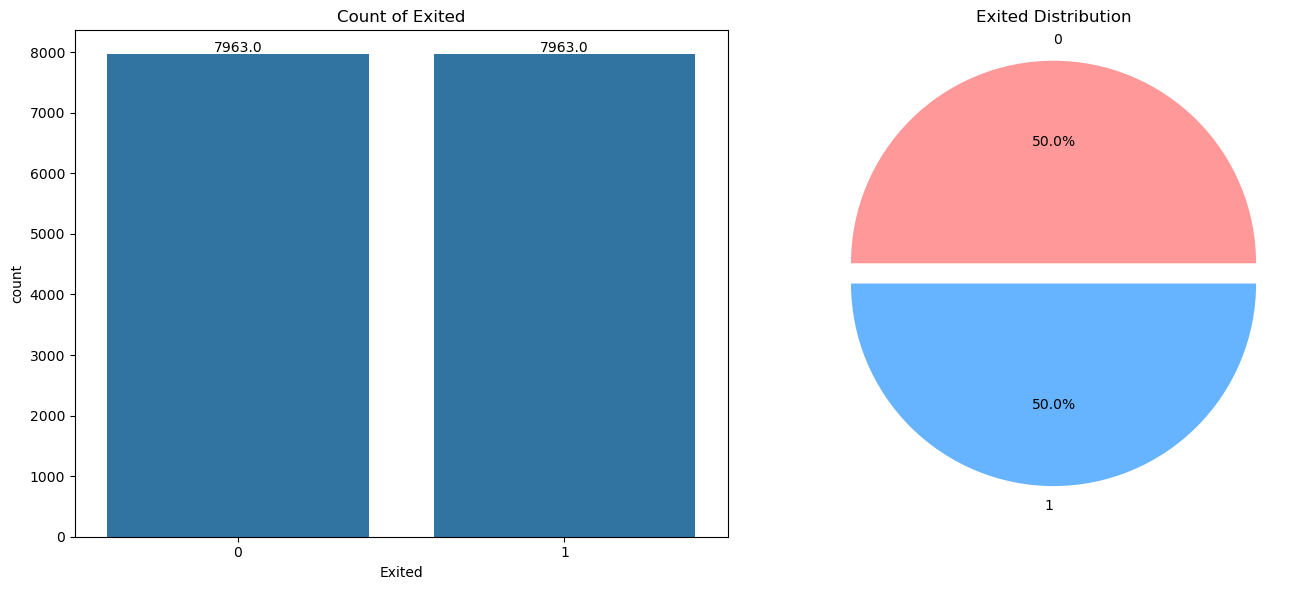

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot with values on bars
sns.countplot(x='Exited', data=df, ax=axs[0])
axs[0].set_title('Count of Exited')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Pie chart
exit_counts = df['Exited'].value_counts()
axs[1].pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=(0.1, 0))
axs[1].set_title('Exited Distribution')

plt.tight_layout()
plt.show()


In [137]:
# onehot on Geography column
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)
df.head() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
0,692,0.220829,2,0.00,2,1,1,105983.09,0,False,True,True
1,516,0.195402,8,113143.12,1,0,0,3363.36,0,False,False,False
2,531,0.195402,1,143407.29,2,0,1,84402.46,0,False,True,True
3,717,0.192094,2,99472.76,2,1,0,94274.72,1,False,False,False
4,737,0.213111,1,125537.38,1,1,0,138510.01,1,True,False,False


In [139]:
# let's split data
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [141]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
# Build the model
model = Sequential()

# Input layer + First hidden layer
model.add(Dense(units=352, activation='tanh', input_dim = 11))
model.add(Dropout(0.2))

# Additional hidden layers based on best hyperparameters
model.add(Dense(units=160, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(units=384, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(units=448, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=352, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.34))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Change to 'softmax' for multi-class classification

C:\Users\yuvaraj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
loss='binary_crossentropy',  # Change to 'categorical_crossentropy' for multi-class
metrics=['accuracy'])

In [147]:
# define early stopping
early_stopping = EarlyStopping( patience=5, restore_best_weights=True)
# Train model
history = model.fit(X_train, y_train,epochs=500,
validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.6690 - loss: 0.6217 - val_accuracy: 0.7489 - val_loss: 0.5267
Epoch 2/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7490 - loss: 0.5096 - val_accuracy: 0.7706 - val_loss: 0.4728
Epoch 3/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7566 - loss: 0.4972 - val_accuracy: 0.7674 - val_loss: 0.4713
Epoch 4/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7634 - loss: 0.4868 - val_accuracy: 0.7674 - val_loss: 0.4637
Epoch 5/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7642 - loss: 0.4861 - val_accuracy: 0.7837 - val_loss: 0.4561
Epoch 6/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7693 - loss: 0.4734 - val_accuracy: 0.7765 - val_loss: 0.4636
Epoch 7/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7683 - loss: 0.4738 - val_accuracy: 0.7759 - val_loss: 0.4657
Epoch 8/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7761 - loss: 0.4687

In [148]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8780 - loss: 0.3181
Test accuracy: 0.8779033422470093


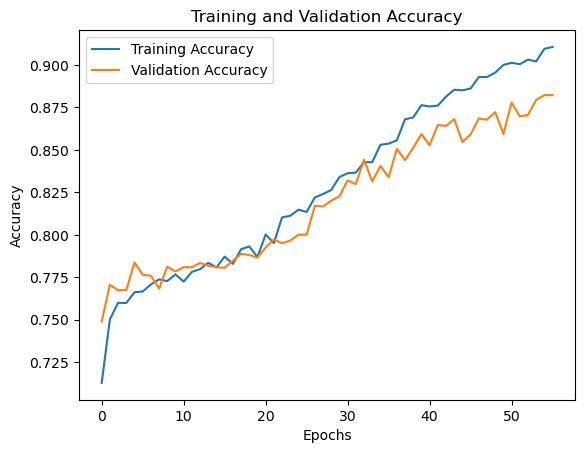

In [149]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

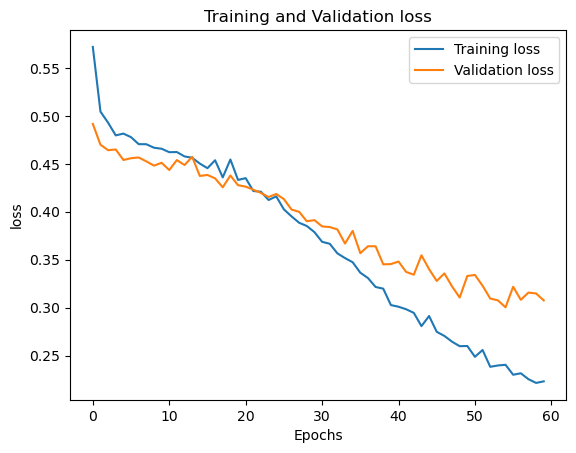

In [66]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1582
           1       0.83      0.95      0.89      1604

    accuracy                           0.88      3186
   macro avg       0.89      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



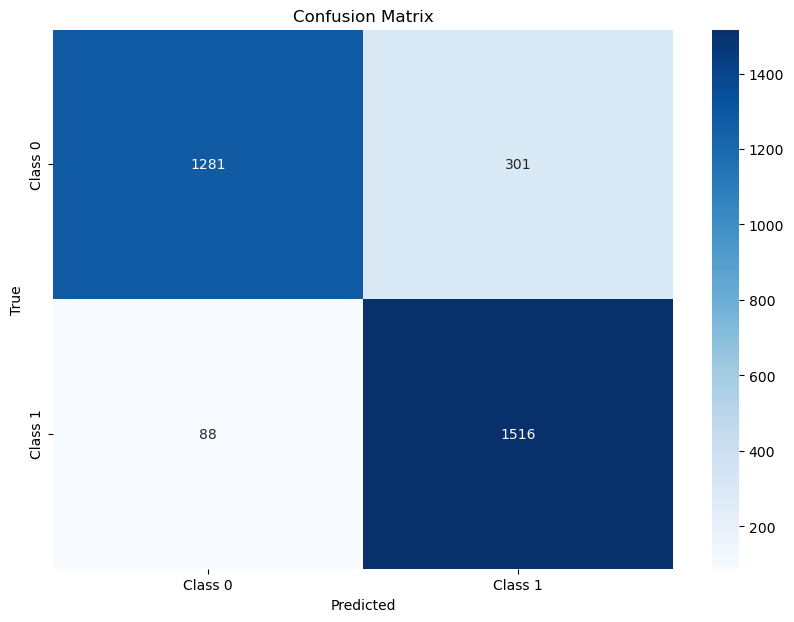

In [150]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary class labels

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
